# Linear Regression For Hospitalized

# Import Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Covid19India.csv')
data

,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
100279,23418,1.0,19/06/2020,NaN,NaN,NaN,Pulwama,Jammu and Kashmir,Hospitalized,19,6,2020
100280,23419,2.0,19/06/2020,NaN,NaN,NaN,Reasi,Jammu and Kashmir,Recovered,19,6,2020
100281,23420,-2.0,19/06/2020,NaN,NaN,NaN,Kishtwar,Jammu and Kashmir,Recovered,19,6,2020
100282,23421,-3.0,19/06/2020,NaN,NaN,NaN,East Sikkim,Sikkim,Recovered,19,6,2020


In [4]:
data = data.iloc[:,1:]
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...
100279,1.0,19/06/2020,NaN,NaN,NaN,Pulwama,Jammu and Kashmir,Hospitalized,19,6,2020
100280,2.0,19/06/2020,NaN,NaN,NaN,Reasi,Jammu and Kashmir,Recovered,19,6,2020
100281,-2.0,19/06/2020,NaN,NaN,NaN,Kishtwar,Jammu and Kashmir,Recovered,19,6,2020
100282,-3.0,19/06/2020,NaN,NaN,NaN,East Sikkim,Sikkim,Recovered,19,6,2020


In [5]:
Day = data[data['Current Status'] == 'Hospitalized'].groupby(['Month', 'Day'])[['Num Cases']].sum()
Day

Num Cases
Month Day           
3     4          5.0
      5          1.0
      7          2.0
      9          4.0
      10         4.0
...              ...
6     15     10032.0
      16     11086.0
      17     13108.0
      18     13829.0
      19     14740.0

[106 rows x 1 columns]

In [6]:
x = np.arange(len(Day))
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105])

In [7]:
y = Day.values
y

array([[5.0000e+00],
       [1.0000e+00],
       [2.0000e+00],
       [4.0000e+00],
       [4.0000e+00],
       [8.0000e+00],
       [4.0000e+00],
       [6.0000e+00],
       [1.1000e+01],
       [8.0000e+00],
       [1.2000e+01],
       [1.4000e+01],
       [2.2000e+01],
       [2.1000e+01],
       [5.2000e+01],
       [6.7000e+01],
       [5.9000e+01],
       [8.2000e+01],
       [6.3000e+01],
       [7.5000e+01],
       [5.8000e+01],
       [1.4000e+02],
       [1.2300e+02],
       [1.0600e+02],
       [1.7800e+02],
       [3.0600e+02],
       [4.2300e+02],
       [4.8500e+02],
       [5.5600e+02],
       [5.7600e+02],
       [6.0600e+02],
       [4.8500e+02],
       [5.7000e+02],
       [5.6300e+02],
       [8.1200e+02],
       [8.7000e+02],
       [8.5300e+02],
       [7.5800e+02],
       [1.2430e+03],
       [1.0310e+03],
       [8.8400e+02],
       [1.0610e+03],
       [9.2200e+02],
       [1.3700e+03],
       [1.5790e+03],
       [1.2390e+03],
       [1.5370e+03],
       [1.292

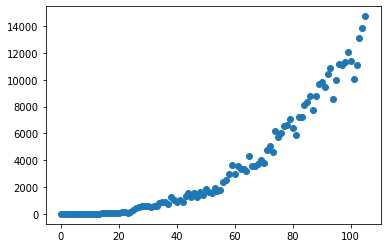

In [8]:
plt.scatter(x,y)
plt.show()

In [9]:
x = x.reshape(-1,1)
x

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [11]:
regressor.predict([[107]])

array([[10384.35327103]])

In [12]:
Yp = regressor.predict(x)
Yp

array([[-2.67595239e+03],
       [-2.55389346e+03],
       [-2.43183453e+03],
       [-2.30977560e+03],
       [-2.18771666e+03],
       [-2.06565773e+03],
       [-1.94359880e+03],
       [-1.82153987e+03],
       [-1.69948094e+03],
       [-1.57742201e+03],
       [-1.45536308e+03],
       [-1.33330414e+03],
       [-1.21124521e+03],
       [-1.08918628e+03],
       [-9.67127350e+02],
       [-8.45068418e+02],
       [-7.23009487e+02],
       [-6.00950555e+02],
       [-4.78891624e+02],
       [-3.56832693e+02],
       [-2.34773761e+02],
       [-1.12714830e+02],
       [ 9.34410157e+00],
       [ 1.31403033e+02],
       [ 2.53461964e+02],
       [ 3.75520896e+02],
       [ 4.97579827e+02],
       [ 6.19638759e+02],
       [ 7.41697690e+02],
       [ 8.63756621e+02],
       [ 9.85815553e+02],
       [ 1.10787448e+03],
       [ 1.22993342e+03],
       [ 1.35199235e+03],
       [ 1.47405128e+03],
       [ 1.59611021e+03],
       [ 1.71816914e+03],
       [ 1.84022807e+03],
       [ 1.9

# Linear Regression For Deceased

In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('Covid19India.csv')
data

,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
100279,23418,1.0,19/06/2020,NaN,NaN,NaN,Pulwama,Jammu and Kashmir,Hospitalized,19,6,2020
100280,23419,2.0,19/06/2020,NaN,NaN,NaN,Reasi,Jammu and Kashmir,Recovered,19,6,2020
100281,23420,-2.0,19/06/2020,NaN,NaN,NaN,Kishtwar,Jammu and Kashmir,Recovered,19,6,2020
100282,23421,-3.0,19/06/2020,NaN,NaN,NaN,East Sikkim,Sikkim,Recovered,19,6,2020


In [15]:
data = data.iloc[:,1:]
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...
100279,1.0,19/06/2020,NaN,NaN,NaN,Pulwama,Jammu and Kashmir,Hospitalized,19,6,2020
100280,2.0,19/06/2020,NaN,NaN,NaN,Reasi,Jammu and Kashmir,Recovered,19,6,2020
100281,-2.0,19/06/2020,NaN,NaN,NaN,Kishtwar,Jammu and Kashmir,Recovered,19,6,2020
100282,-3.0,19/06/2020,NaN,NaN,NaN,East Sikkim,Sikkim,Recovered,19,6,2020


In [16]:
Day = data[data['Current Status'] == 'Deceased'].groupby(['Month', 'Day'])[['Num Cases']].sum()
Day

Num Cases
Month Day           
3     12         2.0
      13         1.0
      19         1.0
      21         3.0
      22         2.0
...              ...
6     15       396.0
      16      2004.0
      17       341.0
      18       343.0
      19       364.0

[80 rows x 1 columns]

In [17]:
x = np.arange(len(Day))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

In [18]:
y = Day.values
y

array([[2.000e+00],
       [1.000e+00],
       [1.000e+00],
       [3.000e+00],
       [2.000e+00],
       [3.000e+00],
       [1.000e+00],
       [1.000e+00],
       [2.000e+00],
       [2.000e+00],
       [2.000e+00],
       [1.000e+00],
       [1.000e+00],
       [1.000e+00],
       [1.000e+00],
       [4.000e+00],
       [3.000e+00],
       [3.000e+00],
       [3.000e+00],
       [1.000e+00],
       [1.000e+00],
       [1.000e+00],
       [1.000e+00],
       [2.000e+00],
       [1.000e+00],
       [1.000e+00],
       [5.800e+01],
       [6.900e+01],
       [7.100e+01],
       [7.500e+01],
       [7.700e+01],
       [9.200e+01],
       [1.400e+02],
       [1.030e+02],
       [1.280e+02],
       [9.100e+01],
       [1.040e+02],
       [9.700e+01],
       [1.160e+02],
       [1.120e+02],
       [8.100e+01],
       [1.200e+02],
       [1.370e+02],
       [9.700e+01],
       [1.040e+02],
       [1.200e+02],
       [1.520e+02],
       [1.310e+02],
       [1.460e+02],
       [1.340e+02],


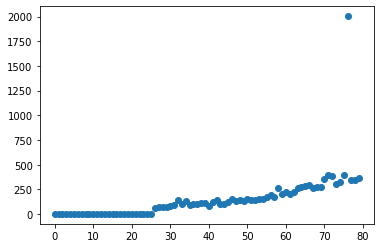

In [19]:
plt.scatter(x,y)
plt.show()

In [20]:
x = x.reshape(-1,1)
x

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [22]:
regressor.predict([[107]])

array([[584.72341772]])

In [23]:
Yp = regressor.predict(x)
Yp

array([[-101.75833333],
       [ -95.34261603],
       [ -88.92689873],
       [ -82.51118143],
       [ -76.09546414],
       [ -69.67974684],
       [ -63.26402954],
       [ -56.84831224],
       [ -50.43259494],
       [ -44.01687764],
       [ -37.60116034],
       [ -31.18544304],
       [ -24.76972574],
       [ -18.35400844],
       [ -11.93829114],
       [  -5.52257384],
       [   0.89314346],
       [   7.30886076],
       [  13.72457806],
       [  20.14029536],
       [  26.55601266],
       [  32.97172996],
       [  39.38744726],
       [  45.80316456],
       [  52.21888186],
       [  58.63459916],
       [  65.05031646],
       [  71.46603376],
       [  77.88175105],
       [  84.29746835],
       [  90.71318565],
       [  97.12890295],
       [ 103.54462025],
       [ 109.96033755],
       [ 116.37605485],
       [ 122.79177215],
       [ 129.20748945],
       [ 135.62320675],
       [ 142.03892405],
       [ 148.45464135],
       [ 154.87035865],
       [ 161.286

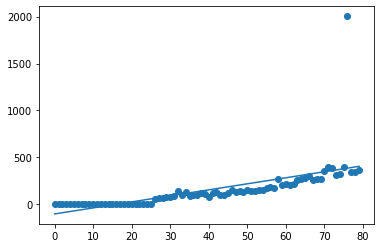

In [24]:
plt.scatter(x,y)
plt.plot(x,Yp)
plt.show()

In [25]:
regressor.score(x,y)*100

38.1118060190085

In [26]:
regressor.predict([[120]])

array([[668.12774262]])